# Fitting Data with a Line

How many of you have probably used Excel to fit data with a line.

![excel_linear_regression](img/excel_linear_regression.jpg)

We're going to review the math involved in this process to help understand how AI works.

In [1]:
# this is a library that assists in reading and handling data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time


In [2]:
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


<AxesSubplot:xlabel='GrLivArea'>

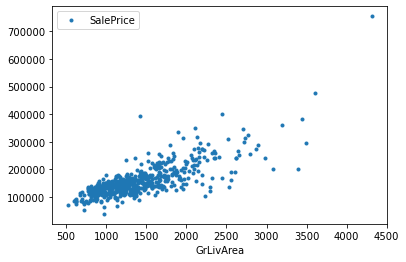

In [3]:
data.plot(x='GrLivArea',y='SalePrice',style='.')

If you have data, $(x,y)$, that you think can be fit by a line, $y = m x + b$, then there are simple equations one can use to calculate the slope ($m$) and intercept ($b$).

They are:

$$m = { n (\Sigma xy) - (\Sigma x) (\Sigma y) \over n (\Sigma x^2) - (\Sigma x)^2 } $$

$$b = { (\Sigma y) (\Sigma x^2) - (\Sigma x) (\Sigma xy) \over n (\Sigma x^2) - (\Sigma x)^2 } $$

In [4]:
n = len(data)
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()
sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)

denominator = n * sum_x2 - sum_x * sum_x
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator

print('y = %f * x + %f' % (m,b))
m_calc = m
b_calc = b

y = 87.688145 * x + 34754.077892


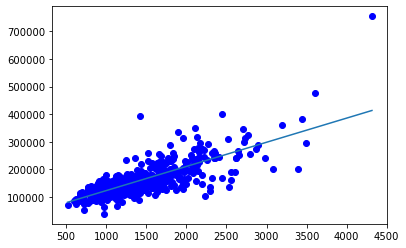

In [5]:
def plot_data(x,y,m,b):
   plt.plot(x,y,'bo')
   linear_x = np.arange(x.min(),x.max())
   linear_y = linear_x * m + b
   plt.plot(linear_x,linear_y)
plot_data(x,y,m,b)

# Stochastic Gradient Descent

SGD is a common method in AI for training deep neural networks on large datasets. It is an iterative method for optimizing a loss function that we get to define. We will use this simple linear regression to demonstrate how it works.

# The model

In AI, neural networks are often referred to as a _model_ because, once fully trained, they should model (AKA predict) the behavior of our system. In our example, the system is how house prices vary based on house size. We know our system system is roughly driven by a linear function:

$$ \hat{y_i}(x_i) = m * x_i + b $$

We just need to figure out $m$ and $b$.


In [6]:
def model(x,m,b):
   return m * x + b



# The Loss Function

A _loss function_, or objective function, is something we define and is based on what we want to achieve. In the method of SGD, it is our goal to minimize (or make close to zero) the values calculated from the _loss function_. In our example, we ideally want the prediction of our _model_ to be equal to the actual data, though we will settle for "as close as possible".

So our _loss function_ looks like this:

$$ L(y_i,\hat{y_i}) = (y_i - \hat{y_i}(x_i))^2 $$

where $y_i$ is our $i^{th}$ entry in the `data['SalePrice']` vector and $\hat{y_i}$ is the prediction based on evaluting $m * x_i + b$.


In [7]:

def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )


# Minimizing the Loss Function

We want to use the loss function in order to guide how to update $m$ and $b$ to better model our system. In calculus we learn to minimize a function with respect to a variable you calculate:

$$ { \partial L \over \partial m } = 0 $$

$$ { \partial L \over \partial m } = -2 x_i (y_i - \hat{y_i}(x_i)) $$
$$ { \partial L \over \partial b } = -2 (y_i - \hat{y_i}(x_i)) $$

We can use this to calculate an adjustment to $m$ and $b$ that will reduce the loss function, effectively improving our fitting parameters. This is done using this equation:

$$ m' = m - \eta { \partial L \over \partial m }$$
$$ b' = b - \eta { \partial L \over \partial b }$$

In [8]:
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.sum(dL_dm,axis=0)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.sum(dL_db,axis=0)
   return b - learning_rate * dL_db

# Putting it together

We can now randomly select our initial slope and intercept:

In [9]:
m = 5.
b = 1000.
print('y_i = %.2f * x + %.2f' % (m,b))

y_i = 5.00 * x + 1000.00


Then we can calculate our Loss function:

In [10]:
l = loss(x,y,m,b)
print('first 10 loss values: ',l[:10])

first 10 loss values:  [3.03421561e+10 3.55511025e+10 1.24579082e+10 1.91656336e+10
 1.60604929e+10 2.04432804e+10 1.72410030e+10 1.76517796e+10
 1.52769600e+10 2.18152900e+10]


y_i = 30.80 * x + 13545.76     previously calculated: y_i = 87.69 * x + 34754.08


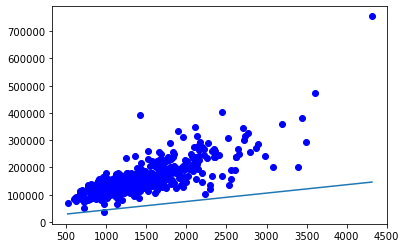

In [11]:
learning_rate = 0.0000000001
m = updated_m(x,y,m,b,learning_rate)
b = updated_b(x,y,m,b,1000000*learning_rate)
print('y_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f' % (m,b,m_calc,b_calc))
plot_data(x,y,m,b)

y_i = 88.11 * x + 35854.67     previously calculated: y_i = 87.69 * x + 34754.08


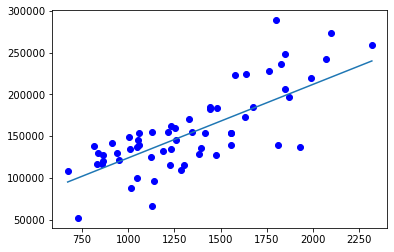

In [13]:
m = 5.
b = 1000.
batch_size = 60
learning_rate = 1e-9
for i in range(100):
   data_batch = data.sample(batch_size)
   x = data_batch['GrLivArea'].to_numpy()
   y = data_batch['SalePrice'].to_numpy()

   m = updated_m(x,y,m,b,learning_rate)
   b = updated_b(x,y,m,b,1e6*learning_rate)
   print('y_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f' % (m,b,m_calc,b_calc))
   plt.close('all')
   plot_data(x,y,m,b)
   plt.show()
   time.sleep(0.5)
   plt.close('all')
   ipydis.clear_output(wait=True)
